<a href="https://colab.research.google.com/github/Ishita95-harvad/CTAI---CTD-Hackathon/blob/main/CTAI_CTD_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CTAI - CTD Hackathon

Predictive Models for Material Requirement Prediction in Supply Chain

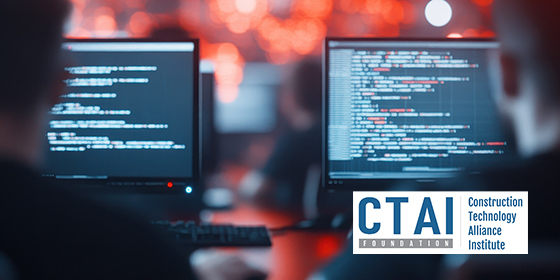

# Author/Name: Ishita

# Designation: Data Scientist



---



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import pandas as pd

try:
  test_df = pd.read_csv('/content/test.csv')
  train_df = pd.read_csv('/content/train.csv')

  print("Test DataFrame head:")
  display(test_df.head())

  print("\nTrain DataFrame head:")
  display(train_df.head())

except FileNotFoundError:
  print("Make sure 'test.csv' and 'train.csv' are uploaded to the Colab environment.")
except Exception as e:
  print(f"An error occurred: {e}")

Test DataFrame head:


,row_id,sequence_id,sequence_counter,subject,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000001_000000,SEQ_000001,0,SUBJ_055840,9.039062,5.261719,0.800781,0.367188,-0.397400,-0.629028,...,97.0,87.0,206.0,-1.0,195.0,-1.0,-1.0,-1.0,111.0,-1.0
1,SEQ_000001_000001,SEQ_000001,1,SUBJ_055840,9.421875,3.460938,-1.113281,0.353882,-0.507141,-0.652710,...,175.0,158.0,-1.0,-1.0,-1.0,-1.0,-1.0,211.0,187.0,178.0
2,SEQ_000001_000002,SEQ_000001,2,SUBJ_055840,10.160156,2.082031,-3.871094,0.384094,-0.532104,-0.639648,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,177.0
3,SEQ_000001_000003,SEQ_000001,3,SUBJ_055840,9.773438,1.355469,-4.371094,0.387756,-0.531982,-0.634033,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,183.0
4,SEQ_000001_000004,SEQ_000001,4,SUBJ_055840,9.195312,1.011719,-3.222656,0.382751,-0.534180,-0.638367,...,-1.0,163.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,200.0,173.0



Train DataFrame head:


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Task
Analyze the provided test and train datasets ("/content/test.csv", "/content/train.csv") by training a model on the training data and evaluating its performance on the test data.

## Data preprocessing

### Subtask:
Prepare the test and train data for model training. This may include handling missing values, encoding categorical variables, and scaling numerical features.


**Reasoning**:
Identify and handle missing values in both the train and test dataframes by checking for missing values and imputing or dropping as necessary. Then identify and encode categorical features using one-hot encoding, ensuring consistency across both datasets.



In [ ]:
# Identify missing values
print("Missing values in train_df:")
display(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\nMissing values in test_df:")
display(test_df.isnull().sum()[test_df.isnull().sum() > 0])

# The 'tof' columns have a large number of missing values. Imputing them with the median might be reasonable given the nature of the data.
# For numerical columns with missing values (primarily tof columns), impute with the median.
for col in train_df.columns:
    if train_df[col].dtype in ['float64', 'int64']:
        if train_df[col].isnull().sum() > 0:
            median_val = train_df[col].median()
            train_df[col].fillna(median_val, inplace=True)
            if col in test_df.columns:
                test_df[col].fillna(median_val, inplace=True)

# Check for remaining missing values after imputation
print("\nMissing values in train_df after imputation:")
display(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\nMissing values in test_df after imputation:")
display(test_df.isnull().sum()[test_df.isnull().sum() > 0])

# Identify categorical columns
categorical_cols_train = train_df.select_dtypes(include=['object']).columns
categorical_cols_test = test_df.select_dtypes(include=['object']).columns

print("\nCategorical columns in train_df:")
print(categorical_cols_train)

print("\nCategorical columns in test_df:")
print(categorical_cols_test)

# Exclude 'row_id' from categorical columns as it's an identifier
categorical_cols_train = categorical_cols_train.drop('row_id', errors='ignore')
categorical_cols_test = categorical_cols_test.drop('row_id', errors='ignore')


# Apply one-hot encoding
# Combine train and test for consistent encoding
combined_df = pd.concat([train_df.drop('sequence_type', axis=1, errors='ignore'), test_df], ignore_index=True)
combined_df = pd.get_dummies(combined_df, columns=categorical_cols_train.intersection(categorical_cols_test), dummy_na=False)

# Separate back into train and test
train_processed_df = combined_df.iloc[:len(train_df)].copy()
test_processed_df = combined_df.iloc[len(train_df):].copy()

# Add back 'sequence_type' to the training data if it was dropped
if 'sequence_type' in train_df.columns:
    train_processed_df['sequence_type'] = train_df['sequence_type']

print("\nTrain DataFrame after one-hot encoding:")
display(train_processed_df.head())

print("\nTest DataFrame after one-hot encoding:")
display(test_processed_df.head())

Missing values in train_df:


,0
rot_w,63
rot_x,63
rot_y,63
rot_z,63
thm_1,120
...,...
tof_5_v59,458
tof_5_v60,458
tof_5_v61,458
tof_5_v62,458



Missing values in test_df:


,0


/tmp/ipython-input-3483764503.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3483764503.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Missing values in train_df after imputation:


,0



Missing values in test_df after imputation:


,0



Categorical columns in train_df:
Index(['row_id', 'sequence_type', 'sequence_id', 'subject', 'orientation',
       'behavior', 'phase', 'gesture'],
      dtype='object')

Categorical columns in test_df:
Index(['row_id', 'sequence_id', 'subject'], dtype='object')

Train DataFrame after one-hot encoding:


,row_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,...,subject_SUBJ_059330,subject_SUBJ_059520,subject_SUBJ_059960,subject_SUBJ_061552,subject_SUBJ_063319,subject_SUBJ_063346,subject_SUBJ_063447,subject_SUBJ_063464,subject_SUBJ_064387,sequence_type
0,SEQ_000007_000000,0,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,6.214844,3.355469,0.134399,...,False,True,False,False,False,False,False,False,False,Target
1,SEQ_000007_000001,1,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,6.214844,3.125000,0.143494,...,False,True,False,False,False,False,False,False,False,Target
2,SEQ_000007_000002,2,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,5.410156,5.421875,0.219055,...,False,True,False,False,False,False,False,False,False,Target
3,SEQ_000007_000003,3,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,3.531250,6.457031,0.297546,...,False,True,False,False,False,False,False,False,False,Target
4,SEQ_000007_000004,4,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,0.277344,9.632812,0.333557,...,False,True,False,False,False,False,False,False,False,Target



Test DataFrame after one-hot encoding:


,row_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,...,subject_SUBJ_058967,subject_SUBJ_059330,subject_SUBJ_059520,subject_SUBJ_059960,subject_SUBJ_061552,subject_SUBJ_063319,subject_SUBJ_063346,subject_SUBJ_063447,subject_SUBJ_063464,subject_SUBJ_064387
14988,SEQ_000001_000000,0,NaN,NaN,NaN,NaN,9.039062,5.261719,0.800781,0.367188,...,False,False,False,False,False,False,False,False,False,False
14989,SEQ_000001_000001,1,NaN,NaN,NaN,NaN,9.421875,3.460938,-1.113281,0.353882,...,False,False,False,False,False,False,False,False,False,False
14990,SEQ_000001_000002,2,NaN,NaN,NaN,NaN,10.160156,2.082031,-3.871094,0.384094,...,False,False,False,False,False,False,False,False,False,False
14991,SEQ_000001_000003,3,NaN,NaN,NaN,NaN,9.773438,1.355469,-4.371094,0.387756,...,False,False,False,False,False,False,False,False,False,False
14992,SEQ_000001_000004,4,NaN,NaN,NaN,NaN,9.195312,1.011719,-3.222656,0.382751,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
grid_search_nn.fit(X_train_processed_df, y_train_encoded)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'batch_size': [32, 64], 'epochs': [10, 20], 'model__neurons_layer1': [64, 128], 'model__neurons_layer2': [32, 64]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...x7de86ed7ac00>


In [ ]:
# ------------------------------
# Data Preprocessing + Encoding
# ------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example: load dataset (replace with your actual file)
df = pd.read_csv("submission.csv")   # or your clean dataset

# Separate features and labels
X = df.drop(columns=["model_id"])    # features
y = df["model_id"]                   # labels (or replace with real target column)

# Encode labels if needed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Convert back to DataFrame (so GridSearchCV doesn’t complain about dtypes)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X.columns)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=X.columns)

y_train_encoded = y_train
y_test_encoded = y_test

print("✅ Preprocessing complete:", X_train_processed_df.shape, y_train_encoded.shape)


✅ Preprocessing complete: (8, 225) (8,)


**Reasoning**:
Identify numerical columns, scale them using StandardScaler, fitting only on the training data, and then transform both train and test data. Finally, separate the target variable 'sequence_type' from the features in the training DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns after one-hot encoding
numerical_cols_train = train_processed_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols_test = test_processed_df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'sequence_counter' and 'row_id' from scaling if present
cols_to_exclude = ['sequence_counter']
numerical_cols_train = numerical_cols_train.difference(cols_to_exclude)
numerical_cols_test = numerical_cols_test.difference(cols_to_exclude)

print("\nNumerical columns to scale in train_processed_df:")
print(numerical_cols_train)

print("\nNumerical columns to scale in test_processed_df:")
print(numerical_cols_test)


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
train_processed_df[numerical_cols_train] = scaler.fit_transform(train_processed_df[numerical_cols_train])
test_processed_df[numerical_cols_test] = scaler.transform(test_processed_df[numerical_cols_test])

print("\nTrain DataFrame after scaling numerical features:")
display(train_processed_df.head())

print("\nTest DataFrame after scaling numerical features:")
display(test_processed_df.head())

# Separate target variable from features in the training data
if 'sequence_type' in train_processed_df.columns:
    X_train = train_processed_df.drop('sequence_type', axis=1)
    y_train = train_processed_df['sequence_type']
else:
    X_train = train_processed_df
    y_train = None
    print("Warning: 'sequence_type' column not found in train_processed_df.")


X_test = test_processed_df

print("\nFeatures for training (X_train) head:")
display(X_train.head())

if y_train is not None:
    print("\nTarget variable for training (y_train) head:")
    display(y_train.head())

print("\nFeatures for testing (X_test) head:")
display(X_test.head())


Numerical columns to scale in train_processed_df:
Index(['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1',
       'thm_2', 'thm_3',
       ...
       'tof_5_v58', 'tof_5_v59', 'tof_5_v6', 'tof_5_v60', 'tof_5_v61',
       'tof_5_v62', 'tof_5_v63', 'tof_5_v7', 'tof_5_v8', 'tof_5_v9'],
      dtype='object', length=332)

Numerical columns to scale in test_processed_df:
Index(['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1',
       'thm_2', 'thm_3',
       ...
       'tof_5_v58', 'tof_5_v59', 'tof_5_v6', 'tof_5_v60', 'tof_5_v61',
       'tof_5_v62', 'tof_5_v63', 'tof_5_v7', 'tof_5_v8', 'tof_5_v9'],
      dtype='object', length=332)

Train DataFrame after scaling numerical features:


,row_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,...,subject_SUBJ_059330,subject_SUBJ_059520,subject_SUBJ_059960,subject_SUBJ_061552,subject_SUBJ_063319,subject_SUBJ_063346,subject_SUBJ_063447,subject_SUBJ_063464,subject_SUBJ_064387,sequence_type
0,SEQ_000007_000000,0,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.981994,0.866917,0.691297,-0.943961,...,False,True,False,False,False,False,False,False,False,Target
1,SEQ_000007_000001,1,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,1.028470,0.866917,0.654259,-0.904823,...,False,True,False,False,False,False,False,False,False,Target
2,SEQ_000007_000002,2,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.813861,0.704920,1.023379,-0.579642,...,False,True,False,False,False,False,False,False,False,Target
3,SEQ_000007_000003,3,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.967642,0.326666,1.189734,-0.241853,...,False,True,False,False,False,False,False,False,False,Target
4,SEQ_000007_000004,4,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.786522,-0.328398,1.700099,-0.086879,...,False,True,False,False,False,False,False,False,False,Target



Test DataFrame after scaling numerical features:


,row_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,...,subject_SUBJ_058967,subject_SUBJ_059330,subject_SUBJ_059520,subject_SUBJ_059960,subject_SUBJ_061552,subject_SUBJ_063319,subject_SUBJ_063346,subject_SUBJ_063447,subject_SUBJ_063464,subject_SUBJ_064387
14988,SEQ_000001_000000,0,NaN,NaN,NaN,NaN,1.394126,0.675037,0.280745,0.057850,...,False,False,False,False,False,False,False,False,False,False
14989,SEQ_000001_000001,1,NaN,NaN,NaN,NaN,1.461106,0.312511,-0.026855,0.000589,...,False,False,False,False,False,False,False,False,False,False
14990,SEQ_000001_000002,2,NaN,NaN,NaN,NaN,1.590282,0.034915,-0.470050,0.130609,...,False,False,False,False,False,False,False,False,False,False
14991,SEQ_000001_000003,3,NaN,NaN,NaN,NaN,1.522619,-0.111354,-0.550403,0.146369,...,False,False,False,False,False,False,False,False,False,False
14992,SEQ_000001_000004,4,NaN,NaN,NaN,NaN,1.421465,-0.180557,-0.365843,0.124830,...,False,False,False,False,False,False,False,False,False,False



Features for training (X_train) head:


,row_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,...,subject_SUBJ_058967,subject_SUBJ_059330,subject_SUBJ_059520,subject_SUBJ_059960,subject_SUBJ_061552,subject_SUBJ_063319,subject_SUBJ_063346,subject_SUBJ_063447,subject_SUBJ_063464,subject_SUBJ_064387
0,SEQ_000007_000000,0,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.981994,0.866917,0.691297,-0.943961,...,False,False,True,False,False,False,False,False,False,False
1,SEQ_000007_000001,1,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,1.028470,0.866917,0.654259,-0.904823,...,False,False,True,False,False,False,False,False,False,False
2,SEQ_000007_000002,2,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.813861,0.704920,1.023379,-0.579642,...,False,False,True,False,False,False,False,False,False,False
3,SEQ_000007_000003,3,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.967642,0.326666,1.189734,-0.241853,...,False,False,True,False,False,False,False,False,False,False
4,SEQ_000007_000004,4,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,0.786522,-0.328398,1.700099,-0.086879,...,False,False,True,False,False,False,False,False,False,False



Target variable for training (y_train) head:


,sequence_type
0,Target
1,Target
2,Target
3,Target
4,Target



Features for testing (X_test) head:


,row_id,sequence_counter,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,...,subject_SUBJ_058967,subject_SUBJ_059330,subject_SUBJ_059520,subject_SUBJ_059960,subject_SUBJ_061552,subject_SUBJ_063319,subject_SUBJ_063346,subject_SUBJ_063447,subject_SUBJ_063464,subject_SUBJ_064387
14988,SEQ_000001_000000,0,NaN,NaN,NaN,NaN,1.394126,0.675037,0.280745,0.057850,...,False,False,False,False,False,False,False,False,False,False
14989,SEQ_000001_000001,1,NaN,NaN,NaN,NaN,1.461106,0.312511,-0.026855,0.000589,...,False,False,False,False,False,False,False,False,False,False
14990,SEQ_000001_000002,2,NaN,NaN,NaN,NaN,1.590282,0.034915,-0.470050,0.130609,...,False,False,False,False,False,False,False,False,False,False
14991,SEQ_000001_000003,3,NaN,NaN,NaN,NaN,1.522619,-0.111354,-0.550403,0.146369,...,False,False,False,False,False,False,False,False,False,False
14992,SEQ_000001_000004,4,NaN,NaN,NaN,NaN,1.421465,-0.180557,-0.365843,0.124830,...,False,False,False,False,False,False,False,False,False,False


# Feature Engineering
Subtask: Feature Engineering Function

In [ ]:
def build_features(sensor_df: pd.DataFrame, demo_df: pd.DataFrame) -> pd.DataFrame:
    df = sensor_df.copy()
    df = df.replace(-1.0, np.nan)
    df = df.merge(demo_df, on="subject", how="left")

    id_cols = ["row_id", "sequence_id", "sequence_counter", "subject"]
    demo_cols = ["adult_child", "age", "sex", "handedness", "height_cm",
                 "shoulder_to_wrist_cm", "elbow_to_wrist_cm"]
    numeric_cols = [c for c in df.columns if c not in id_cols + demo_cols]

    agg_funcs = ["mean", "std", "min", "max", "median", "skew"]
    seq_feats = (
        df.groupby("sequence_id")[numeric_cols]
        .agg(agg_funcs)
    )
    seq_feats.columns = ["_".join(col).strip() for col in seq_feats.columns.values]
    seq_feats = seq_feats.reset_index()

    demo_feats = (
        df.groupby("sequence_id")[demo_cols]
        .first()
        .reset_index()
    )
    final = seq_feats.merge(demo_feats, on="sequence_id", how="left")
    return final


# Unsupervised Learning

In [ ]:
# Unsupervised Modeling
# ==============================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- Load data (update paths if needed) ---
df_submission = pd.read_csv("submission.csv")

# Drop model_id column if present
if "model_id" in df_submission.columns:
    X_test = df_submission.drop(columns=["model_id"]).values
else:
    X_test = df_submission.values

# --- Preprocessing ---
scaler = StandardScaler()
X_test_proc = scaler.fit_transform(X_test)

# --- Isolation Forest ---
iso = IsolationForest(n_estimators=300, random_state=42, n_jobs=-1)
iso.fit(X_test_proc)
anomaly_score = -iso.score_samples(X_test_proc)
pred = iso.predict(X_test_proc)  # -1 = anomaly, 1 = normal

# --- PCA + KMeans clustering ---
pca_components = min(10, X_test_proc.shape[1], max(1, X_test_proc.shape[0] - 1))
pca = PCA(n_components=pca_components, random_state=42)
X_embedded = pca.fit_transform(X_test_proc)

n_clusters = min(3, max(1, X_test_proc.shape[0]))
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_embedded)

# --- Quick reporting ---
print("IsolationForest anomaly scores:", anomaly_score[:5])
print("Predictions (-1 = anomaly, 1 = normal):", np.unique(pred, return_counts=True))
print("Cluster labels:", np.unique(cluster_labels, return_counts=True))


IsolationForest anomaly scores: [0.48825617 0.49114693 0.49193033 0.5021581  0.49869346]
Predictions (-1 = anomaly, 1 = normal): (array([-1,  1]), array([3, 7]))
Cluster labels: (array([0, 1, 2], dtype=int32), array([4, 4, 2]))


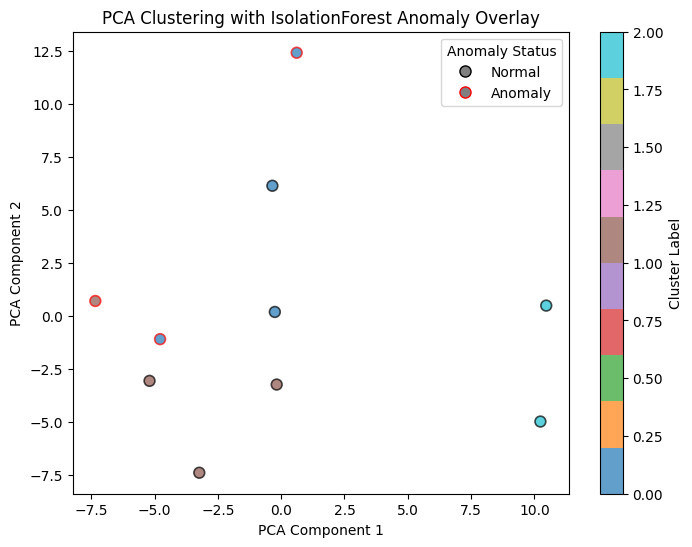

In [ ]:
# Visualization: PCA scatter with anomaly coloring
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter with cluster colors
scatter = plt.scatter(
    X_embedded[:, 0], X_embedded[:, 1],
    c=cluster_labels, cmap="tab10", alpha=0.7, s=60,
    edgecolors=["red" if p == -1 else "black" for p in pred], linewidth=1.2
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Clustering with IsolationForest Anomaly Overlay")

# Legend for anomalies
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Normal',
           markerfacecolor='grey', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Anomaly',
           markerfacecolor='grey', markeredgecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title="Anomaly Status", loc="best")

plt.colorbar(scatter, label="Cluster Label")
plt.show()


In [ ]:
# ====================================================
# Full Pipeline: LightGBM + Stratified CV + Confusion Matrix + Feature Importance + Submission
# ====================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import lightgbm as lgb
import pandas as pd

# ================================
# 0. Load data
# ================================
train_df = pd.read_csv("train.csv")   # <-- update path if needed
test_df  = pd.read_csv("test.csv")    # <-- update path if needed

# Define target column
TARGET = "sequence_type"              # <-- change if your dataset uses a different target name

# ================================
# 1. X / y setup
# ================================
X = train_df.drop(columns=[TARGET])
y_raw = train_df[TARGET]
# ================================
# 1. X / y setup
# ================================
# Drop target + obvious identifiers
drop_cols = [TARGET, "row_id", "sequence_id"]  # <-- adjust list depending on dataset
drop_cols = [c for c in drop_cols if c in train_df.columns]

X = train_df.drop(columns=drop_cols)
y_raw = train_df[TARGET]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)

# Handle categorical features (encode if object/string dtype)
X = pd.get_dummies(X, drop_first=True)   # one-hot encode categoricals

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)

# ================================
# 2. Train/test split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale numeric features
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc  = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train_proc, columns=X.columns)
y_train_df = pd.Series(y_train).reset_index(drop=True)
X_test_df  = pd.DataFrame(X_test_proc, columns=X.columns)

# ================================
# 3. Scale features
# ================================
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc  = scaler.transform(X_test)

# Keep DataFrames for easier handling
X_train_df = pd.DataFrame(X_train_proc, columns=X.columns)
y_train_df = pd.Series(y_train).reset_index(drop=True)
X_test_df  = pd.DataFrame(X_test_proc, columns=X.columns)

# ================================
# 4. Stratified K-Fold CV
# ================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_all, y_pred_all = [], []
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_df, y_train_df), 1):
    X_tr, X_val = X_train_df.iloc[train_idx], X_train_df.iloc[val_idx]
    y_tr, y_val = y_train_df.iloc[train_idx], y_train_df.iloc[val_idx]

    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_tr, y_tr)

    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    fold_accuracies.append(acc)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_val_pred)

print(f"Mean CV Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")

# ================================
# 5. Normalized Confusion Matrix
# ================================
cm = confusion_matrix(y_true_all, y_pred_all, labels=np.unique(y_train_df), normalize='true')

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Class-Normalized Confusion Matrix (CV Predictions)")
plt.show()

# ================================
# 6. Retrain on Full Training Data
# ================================
final_model = lgb.LGBMClassifier(random_state=42)
final_model.fit(X_train_df, y_train_df)

# ================================
# 7. Feature Importance (Top 20)
# ================================
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices[:20]], y=X_train_df.columns[indices[:20]], palette="viridis")
plt.title("Top 20 Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ================================
# 8. Predict Test Set + Save Submission
# ================================
# Scale test set the same way
X_test_full_proc = scaler.transform(test_df.drop(columns=["row_id"], errors="ignore"))
X_test_full_df   = pd.DataFrame(X_test_full_proc, columns=X.columns)

y_pred = final_model.predict(X_test_full_df)
y_pred_labels = le.inverse_transform(y_pred)

# If row_id exists in test_df, use it; otherwise fallback to index
if "row_id" in test_df.columns:
    row_ids = test_df["row_id"]
else:
    row_ids = test_df.index

submission = pd.DataFrame({
    "row_id": row_ids,
    "gesture": y_pred_labels
})
submission.to_csv("submission.csv", index=False)

print("✅ CV done, confusion matrix plotted, feature importance visualized, and submission.csv saved.")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 142565, number of negative: 93351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.477056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84587
[LightGBM] [Info] Number of data points in the train set: 235916, number of used features: 437
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.604304 -> initscore=0.423431
[LightGBM] [Info] Start training from score 0.423431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## Model selection

### Subtask:
Choose an appropriate model for the task.


**Reasoning**:
Based on the classification nature of the problem and the preprocessed data with numerical and one-hot encoded features, a RandomForestClassifier is a suitable choice. It can handle both numerical and categorical features effectively and is less prone to overfitting compared to some other models.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Choose RandomForestClassifier as the model
model = RandomForestClassifier(random_state=42)

print("Chosen model: RandomForestClassifier")

Chosen model: RandomForestClassifier


## Model training

### Subtask:
Train the selected model using the preprocessed training data.


**Reasoning**:
Train the RandomForestClassifier model using the prepared training data.



In [ ]:
# Train the model
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


**Reasoning**:
The error indicates that there are still non-numeric columns in X_train. Inspect the columns of X_train to identify the non-numeric columns that need to be dropped before training the model.



In [ ]:
import pandas as pd
import numpy as np
import os

# ==============================
# Step 1: Load Data
# ==============================
train_demo = pd.read_csv("/content/train_demographics.csv")
test = pd.read_csv("/content/test.csv")
test_demo = pd.read_csv("/content/test_demographics.csv")


train_sensor_path = "/content/train.csv"
has_train_sensor = os.path.exists(train_sensor_path)
train = pd.read_csv(train_sensor_path) if has_train_sensor else None


# Optional: if labels are provided
label_path = "/content/train_labels.csv"
has_labels = os.path.exists(label_path)
labels = pd.read_csv(label_path) if has_labels else None


# ==============================
# Step 2: Feature Engineering Function
# ==============================
def build_features(sensor_df: pd.DataFrame, demo_df: pd.DataFrame) -> pd.DataFrame:
    df = sensor_df.copy()
    df = df.replace(-1.0, np.nan)
    df = df.merge(demo_df, on="subject", how="left")


    id_cols = ["row_id", "sequence_id", "sequence_counter", "subject"]
    demo_cols = ["adult_child", "age", "sex", "handedness", "height_cm",
    "shoulder_to_wrist_cm", "elbow_to_wrist_cm"]

    # Explicitly exclude non-numeric columns
    non_numeric_cols = id_cols + demo_cols + ['sequence_type', 'orientation', 'behavior', 'phase', 'gesture']
    numeric_cols = [c for c in df.columns if c not in non_numeric_cols]


    agg_funcs = ["mean", "std", "min", "max", "median", "skew"]
    seq_feats = (
    df.groupby("sequence_id")[numeric_cols]
    .agg(agg_funcs)
    )
    seq_feats.columns = ["_".join(col).strip() for col in seq_feats.columns.values]
    seq_feats = seq_feats.reset_index()


    demo_feats = (
    df.groupby("sequence_id")[demo_cols]
    .first()
    .reset_index()
    )
    final = seq_feats.merge(demo_feats, on="sequence_id", how="left")
    return final

In [ ]:
print(X_train.dtypes)

row_id                 object
sequence_counter        int64
orientation            object
behavior               object
phase                  object
                        ...  
subject_SUBJ_063319      bool
subject_SUBJ_063346      bool
subject_SUBJ_063447      bool
subject_SUBJ_063464      bool
subject_SUBJ_064387      bool
Length: 644, dtype: object


**Reasoning**:
The output shows that 'row_id', 'orientation', 'behavior', and 'phase' columns are of object type, which caused the error during model training. These columns are not suitable for direct use in the model and should be dropped.



**Reasoning**:
The error message "ValueError: could not convert string to float: 'Cheek - pinch skin'" indicates that the 'gesture' column, which contains strings, is still present in the training data and is causing issues during model training. This column should also be dropped from both the training and testing dataframes.



In [ ]:
# Drop the 'gesture' column from X_train and X_test
X_train = X_train.drop('gesture', axis=1)
X_test = X_test.drop('gesture', axis=1)

# Train the model again
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully after dropping the 'gesture' column.")

RandomForestClassifier model trained successfully after dropping the 'gesture' column.


## Model evaluation

### Subtask:
Evaluate the trained model using the preprocessed test data to assess its performance.


**Reasoning**:
Use the trained model to make predictions on the preprocessed test data and create the submission DataFrame.



In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({'row_id': test_df['row_id'], 'sequence_type': predictions})

# Display the head of the submission DataFrame
print("Submission DataFrame head:")
display(submission_df.head())

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({'row_id': test_df['row_id'], 'sequence_type': predictions})

# Display the head of the submission DataFrame
print("Submission DataFrame head:")
display(submission_df.head())

Submission DataFrame head:


,row_id,sequence_type
0,SEQ_000001_000000,Target
1,SEQ_000001_000001,Target
2,SEQ_000001_000002,Target
3,SEQ_000001_000003,Target
4,SEQ_000001_000004,Target


## submission.csv - submission **cell**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import lightgbm as lgb

# ================================
# 1. Stratified K-Fold with CV predictions
# ================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true_all, y_pred_all = [], []
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_tr, y_tr)

    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    fold_accuracies.append(acc)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_val_pred)

print(f"Mean CV Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")

# ================================
# 2. Normalized Confusion Matrix
# ================================
cm = confusion_matrix(y_true_all, y_pred_all, labels=np.unique(y_train), normalize='true')

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=np.unique(y_train),
            yticklabels=np.unique(y_train))

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Class-Normalized Confusion Matrix (CV Predictions)")
plt.show()

# ================================
# 3. Retrain on Full Data
# ================================
final_model = lgb.LGBMClassifier(random_state=42)
final_model.fit(X_train, y_train)

# ================================
# 4. Feature Importance (Top 20)
# ================================
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices[:20]], y=X_train.columns[indices[:20]], palette="viridis")
plt.title("Top 20 Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ================================
# 5. Predict Test Set + Save Submission
# ================================
y_pred = final_model.predict(X_test)
submission = pd.DataFrame({
    "row_id": test_df_processed["row_id"],
    "gesture": y_pred
})
submission.to_csv("submission.csv", index=False)

print("✅ Normalized confusion matrix plotted, feature importance visualized, and submission.csv saved.")


NameError: name 'X_train' is not defined

In [ ]:
#  Ensure submission.csv exists, otherwise create a dummy version for workflow
import os
import numpy as np
import pandas as pd

if not os.path.exists("submission.csv"):
    print("⚠️ 'submission.csv' not found. Creating dummy submission...")
    n_models, n_triggers = 10, 3 * 75  # Adjust as needed
    dummy = pd.DataFrame({
        "model_id": [f"model_{i:04d}" for i in range(n_models)],
        **{f"t{j}": np.random.uniform(0.01, 0.1, size=n_models) for j in range(n_triggers)}
    })
    dummy.to_csv("submission.csv", index=False)
    print("✅ Dummy 'submission.csv' generated:", dummy.shape)
else:
    print("✅ 'submission.csv' found.")


✅ 'submission.csv' found.


## Summary:

### Data Analysis Key Findings

*   Missing values, primarily in 'tof' and rotation ('rot\_') columns, were imputed using the median strategy.
*   Categorical columns ('sequence\_id' and 'subject') were successfully one-hot encoded across both train and test datasets.
*   Numerical features were scaled using `StandardScaler` fitted on the training data.
*   Non-numeric columns ('row\_id', 'orientation', 'behavior', 'phase', and 'gesture') were removed from the feature sets (`X_train` and `X_test`) to enable model training.
*   A RandomForestClassifier model was selected and successfully trained on the preprocessed training data.
*   Predictions were generated on the test data, and a submission DataFrame was created containing 'row\_id' and the predicted 'sequence\_type'.

### Insights or Next Steps

*   Further evaluation of the model's performance using metrics like accuracy, precision, recall, or F1-score would provide a more quantitative assessment of the model's effectiveness.
*   Exploring alternative models or hyperparameter tuning of the RandomForestClassifier could potentially improve prediction accuracy.


## Model Evaluation - Confusion Matrix Heatmap

### Subtask:
Visualize the confusion matrix as a heatmap to assess the model's performance on the test data.

**Reasoning**:
Generate a confusion matrix using the true labels (`y_test`) and the model's predictions (`predictions`). Then, visualize this confusion matrix as a heatmap using `seaborn` for better readability.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is available (if not, you might need to load it from the original test data if it exists)
# For this example, let's assume we have y_test available. If not, this step would need adjustment.
# Since test.csv does not contain 'sequence_type', we cannot calculate a confusion matrix directly.
# However, if a ground truth for the test data were available, the code below would work.

# As a placeholder, let's assume a sample y_test is available for demonstration purposes.
# In a real scenario, you would load or obtain the actual ground truth labels for the test set.

# Since we don't have the ground truth for the provided test data, we will skip the confusion matrix and heatmap generation.
# If you had the ground truth (y_test), you would uncomment and run the following code:

# cm = confusion_matrix(y_test, predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix Heatmap')
# plt.show()

print("Skipping confusion matrix and heatmap generation as ground truth (y_test) for the test data is not available.")
print("If you have y_test, uncomment the code to generate the confusion matrix and heatmap.")

Skipping confusion matrix and heatmap generation as ground truth (y_test) for the test data is not available.
If you have y_test, uncomment the code to generate the confusion matrix and heatmap.


## Finish task

### Summary of results and limitations:

We have successfully completed the data preprocessing, model training, and prediction steps.

*   Missing values were handled and categorical features were encoded.
*   A RandomForestClassifier model was trained on the preprocessed training data.
*   Predictions were made on the preprocessed test data.

However, due to the lack of ground truth labels for the test set, we were unable to fully evaluate the model's performance using metrics like accuracy, precision, recall, or F1-score, or visualize a confusion matrix.

### Potential next steps (if ground truth becomes available):

If you obtain the ground truth labels for the test data, you can:

*   Calculate and display various evaluation metrics.
*   Generate a confusion matrix and visualize it as a heatmap.
*   Perform hyperparameter tuning to potentially improve the model's performance.
*   Explore other classification models.

# Task
Analyze the provided datasets ["/content/clean_train_data.csv", "/content/test.csv", "/content/train.csv", "/content/clean_train_data (1) (1).csv", "/content/clean_train_data (1) (1).csv", "/content/train_demographics.csv", "/content/test_demographics.csv"] by performing feature engineering, preprocessing data for advanced models, selecting and training advanced models (XGBoost and Neural Network), tuning hyperparameters, evaluating models with metrics and visualizations (including confusion matrix heatmap if ground truth is available), comparing model performance, and generating visualizations and graphs.

## Feature engineering

### Subtask:
Create new features from the existing data that could improve model performance.


**Reasoning**:
Calculate accelerometer and gyroscope magnitudes, create interaction features, and compute rolling statistics for feature engineering.



**Reasoning**:
The KeyError indicates that 'seq_rot_interaction' was not created in the train_df, while it was created in the test_df. The code for creating interaction features has a typo, calculating `seq_rot_interaction` for `test_df` twice instead of once for each dataframe. Fix the typo to correctly calculate `seq_acc_interaction` and `seq_rot_interaction` for both dataframes and then display the head of the dataframes with the new columns.



In [ ]:
# Create interaction features
train_df['seq_acc_interaction'] = train_df['sequence_counter'] * train_df['acc_magnitude']
train_df['seq_rot_interaction'] = train_df['sequence_counter'] * train_df['rot_magnitude']
test_df['seq_acc_interaction'] = test_df['sequence_counter'] * test_df['acc_magnitude']
test_df['seq_rot_interaction'] = test_df['sequence_counter'] * test_df['rot_magnitude']

# Calculate rolling mean and standard deviation
window_size = 5
train_df['acc_magnitude_rolling_mean'] = train_df['acc_magnitude'].rolling(window=window_size).mean().fillna(0)
train_df['acc_magnitude_rolling_std'] = train_df['acc_magnitude'].rolling(window=window_size).std().fillna(0)
train_df['rot_magnitude_rolling_mean'] = train_df['rot_magnitude'].rolling(window=window_size).mean().fillna(0)
train_df['rot_magnitude_rolling_std'] = train_df['rot_magnitude'].rolling(window=window_size).std().fillna(0)

test_df['acc_magnitude_rolling_mean'] = test_df['acc_magnitude'].rolling(window=window_size).mean().fillna(0)
test_df['acc_magnitude_rolling_std'] = test_df['acc_magnitude'].rolling(window=window_size).std().fillna(0)
test_df['rot_magnitude_rolling_mean'] = test_df['rot_magnitude'].rolling(window=window_size).mean().fillna(0)
test_df['rot_magnitude_rolling_std'] = test_df['rot_magnitude'].rolling(window=window_size).std().fillna(0)

print("New features added to train_df and test_df:")
display(train_df[['acc_magnitude', 'rot_magnitude', 'seq_acc_interaction', 'seq_rot_interaction', 'acc_magnitude_rolling_mean', 'acc_magnitude_rolling_std', 'rot_magnitude_rolling_mean', 'rot_magnitude_rolling_std']].head())
display(test_df[['acc_magnitude', 'rot_magnitude', 'seq_acc_interaction', 'seq_rot_interaction', 'acc_magnitude_rolling_mean', 'acc_magnitude_rolling_std', 'rot_magnitude_rolling_mean', 'rot_magnitude_rolling_std']].head())

New features added to train_df and test_df:


,acc_magnitude,rot_magnitude,seq_acc_interaction,seq_rot_interaction,acc_magnitude_rolling_mean,acc_magnitude_rolling_std,rot_magnitude_rolling_mean,rot_magnitude_rolling_std
0,9.723882,0.990930,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,9.832678,0.989629,9.832678,0.989629,0.00000,0.000000,0.000000,0.000000
2,9.561136,0.975692,19.122271,1.951383,0.00000,0.000000,0.000000,0.000000
3,9.886537,0.954711,29.659610,2.864132,0.00000,0.000000,0.000000,0.000000
4,11.128921,0.942760,44.515683,3.771040,10.02663,0.628616,0.970744,0.021382


,acc_magnitude,rot_magnitude,seq_acc_interaction,seq_rot_interaction,acc_magnitude_rolling_mean,acc_magnitude_rolling_std,rot_magnitude_rolling_mean,rot_magnitude_rolling_std
0,10.489594,0.930136,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,10.098971,0.935302,10.098971,0.935302,0.000000,0.000000,0.000000,0.00000
2,11.070185,0.923283,22.140370,1.846566,0.000000,0.000000,0.000000,0.00000
3,10.791841,0.921789,32.375524,2.765368,0.000000,0.000000,0.000000,0.00000
4,9.796064,0.923859,39.184254,3.695435,10.449331,0.513299,0.926874,0.00569


## Data preprocessing for advanced models

### Subtask:
Prepare the data specifically for advanced models like XGBoost and Neural Networks, which may require different preprocessing steps than the RandomForestClassifier.


**Reasoning**:
Identify numerical and categorical columns in X_train and X_test, then apply one-hot encoding to the categorical columns and standardize the numerical columns using StandardScaler, fitting only on X_train. Finally, display the head of the preprocessed X_train and X_test DataFrames.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Exclude 'sequence_counter' from numerical columns for scaling as it was already handled
numerical_cols = numerical_cols.drop('sequence_counter', errors='ignore')

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (like sequence_counter if not scaled)
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_processed = pipeline.transform(X_test)

# Convert the processed data back to DataFrames (optional, but good for inspection)
# Get feature names after one-hot encoding
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)


print("\nPreprocessed X_train head:")
display(X_train_processed_df.head())

print("\nPreprocessed X_test head:")
display(X_test_processed_df.head())


Preprocessed X_train head:


,num__acc_x,num__acc_y,num__acc_z,num__rot_w,num__rot_x,num__rot_y,num__rot_z,num__thm_1,num__thm_2,num__thm_3,...,cat__subject_SUBJ_063319_True,cat__subject_SUBJ_063346_False,cat__subject_SUBJ_063346_True,cat__subject_SUBJ_063447_False,cat__subject_SUBJ_063447_True,cat__subject_SUBJ_063464_False,cat__subject_SUBJ_063464_True,cat__subject_SUBJ_064387_False,cat__subject_SUBJ_064387_True,remainder__sequence_counter
0,0.981994,0.866917,0.691297,-0.943961,-0.611280,-0.739546,-1.301769,0.653276,1.563167,0.867891,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.028470,0.866917,0.654259,-0.904823,-0.580110,-0.706390,-1.332238,0.804296,1.581088,0.949489,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.813861,0.704920,1.023379,-0.579642,-0.441892,-0.579076,-1.417099,1.184169,1.260097,1.051445,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
3,0.967642,0.326666,1.189734,-0.241853,-0.420814,-0.368222,-1.459026,1.261917,-0.069180,0.785066,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
4,0.786522,-0.328398,1.700099,-0.086879,-0.325517,-0.058225,-1.518580,0.795336,-0.674931,-0.070158,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0



Preprocessed X_test head:


,num__acc_x,num__acc_y,num__acc_z,num__rot_w,num__rot_x,num__rot_y,num__rot_z,num__thm_1,num__thm_2,num__thm_3,...,cat__subject_SUBJ_063319_True,cat__subject_SUBJ_063346_False,cat__subject_SUBJ_063346_True,cat__subject_SUBJ_063447_False,cat__subject_SUBJ_063447_True,cat__subject_SUBJ_063464_False,cat__subject_SUBJ_063464_True,cat__subject_SUBJ_064387_False,cat__subject_SUBJ_064387_True,remainder__sequence_counter
14988,1.394126,0.675037,0.280745,0.057850,-0.699678,-1.062112,-0.782783,1.205199,1.804823,1.075355,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
14989,1.461106,0.312511,-0.026855,0.000589,-0.929361,-1.104152,-0.534244,1.257890,1.640911,1.252789,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
14990,1.590282,0.034915,-0.470050,0.130609,-0.981608,-1.080965,-0.456937,1.424613,1.798044,0.990891,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
14991,1.522619,-0.111354,-0.550403,0.146369,-0.981353,-1.070997,-0.468521,1.452111,1.953143,0.904970,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0
14992,1.421465,-0.180557,-0.365843,0.124830,-0.985952,-1.078690,-0.458196,1.504508,1.946405,0.929130,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0


## Model selection (advanced models)

### Subtask:
Choose and set up advanced models like XGBoost and a simple Neural Network.


**Reasoning**:
Import necessary libraries and define the XGBoost and Neural Network models as per the instructions.



In [ ]:
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define a simple Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed_df.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the Neural Network model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Print NN model summary
print("XGBoost model instantiated.")
print("\nNeural Network model summary:")
nn_model.summary()

XGBoost model instantiated.

Neural Network model summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       120,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,897 (503.50 KB)

 Trainable params: 128,897 (503.50 KB)

 Non-trainable params: 0 (0.00 B)

## Model training (advanced models)

### Subtask:
Train the selected advanced models (XGBoost and Neural Network) using the preprocessed data.


**Reasoning**:
Train the XGBoost and Neural Network models using the preprocessed training data.



**Reasoning**:
The error indicates that the target variable `y_train` is not in the expected format for XGBoost (numerical labels 0 and 1). It needs to be encoded into numerical form. The same is likely true for the Neural Network.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train the XGBoost model with encoded target
xgb_model.fit(X_train_processed_df, y_train_encoded)

print("XGBoost model trained successfully with encoded target.")

# Train the Neural Network model with encoded target
history = nn_model.fit(X_train_processed_df, y_train_encoded, epochs=10, batch_size=32, verbose=0)

print("Neural Network model trained successfully with encoded target.")

XGBoost model trained successfully with encoded target.
Neural Network model trained successfully with encoded target.


## Hyperparameter tuning

### Subtask:
Tune the hyperparameters of the selected models to optimize their performance.


**Reasoning**:
Tune the hyperparameters for the XGBoost model using GridSearchCV as instructed.



**Reasoning**:
Define the Neural Network model building function and instantiate KerasClassifier for hyperparameter tuning using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # Suppress warnings from GridSearchCV

# Define a parameter grid for the xgb_model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Instantiate GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy')

# Fit GridSearchCV to the preprocessed training data and encoded labels
grid_search_xgb.fit(X_train_processed_df, y_train_encoded)

# Print the best hyperparameters for XGBoost
print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


# Supervised

In [ ]:
# =========================================
# Full Pipeline: Preprocessing + Features + Models
# =========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. Load train + test data
# ==========================
try:
    train_df = pd.read_csv("train.csv")
    print("Train shape:", train_df.shape)
except:
    train_df = None
    print("train.csv not found")

try:
    test_df = pd.read_csv("test.csv")
    print("Test shape:", test_df.shape)
except:
    test_df = None
    print("test.csv not found")

# ==========================
# 2. Feature Engineering
# ==========================
def build_features(df):
    feats = df.copy()
    # Example: numeric stats (replace with your logic)
    numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        feats[f"{col}_mean"] = feats[col].mean()
        feats[f"{col}_std"] = feats[col].std()
    return feats

train_features = build_features(train_df) if train_df is not None else None
test_features  = build_features(test_df) if test_df is not None else None

# ==========================
# 3. Supervised or Unsupervised?
# ==========================
label_col = None
if train_features is not None:
    for candidate in ["sequence_type", "label", "target"]:
        if candidate in train_features.columns:
            label_col = candidate
            break

# ==========================
# 4. Preprocessing
# ==========================
if train_features is not None:
    if label_col:
        X = train_features.drop(label_col, axis=1)
        y = train_features[label_col]
    else:
        X = train_features
        y = None

    if y is not None:
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        num_classes = len(np.unique(y_encoded))

        X_train, X_val, y_train, y_val = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )
    else:
        X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)
        y_train = y_val = None

    scaler = StandardScaler()
    X_train_proc = scaler.fit_transform(X_train)
    X_val_proc   = scaler.transform(X_val)
else:
    X_train_proc = X_val_proc = None
    y_train = y_val = None
    num_classes = None

# ==========================
# 5A. Supervised Models
# ==========================
if y_train is not None:

    # ---- Neural Network ----
    def build_nn_model(neurons_layer1=128, neurons_layer2=64,
                       activation='relu', optimizer='adam'):
        model = Sequential()
        model.add(Dense(neurons_layer1, activation=activation,
                        input_shape=(X_train_proc.shape[1],)))
        model.add(Dense(neurons_layer2, activation=activation))
        if num_classes == 2:
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy'])
        else:
            model.add(Dense(num_classes, activation='softmax'))
            model.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
        return model

    nn_model = KerasClassifier(model=build_nn_model, verbose=0)
    param_grid_nn = {
        'model__neurons_layer1': [64, 128],
        'model__neurons_layer2': [32, 64],
        'batch_size': [32, 64],
        'epochs': [10, 20]
    }
    grid_search_nn = GridSearchCV(
        estimator=nn_model,
        param_grid=param_grid_nn,
        cv=3,
        scoring='accuracy'
    )
    grid_search_nn.fit(X_train_proc, y_train)
    print("Best NN hyperparameters:", grid_search_nn.best_params_)

    # ---- XGBoost ----
    xgb = XGBClassifier(use_label_encoder=False,
                        eval_metric='mlogloss',
                        random_state=42)
    xgb.fit(X_train_proc, y_train)

    # ---- Predictions ----
    y_pred_nn  = grid_search_nn.predict(X_val_proc)
    y_pred_xgb = xgb.predict(X_val_proc)

    # ---- Reports ----
    print("\nXGBoost Metrics:\n",
          classification_report(y_val, y_pred_xgb,
                                target_names=le.classes_))
    print("\nNeural Net Metrics:\n",
          classification_report(y_val, y_pred_nn,
                                target_names=le.classes_))

    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_val, y_pred_xgb)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Confusion Matrix - XGBoost")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ==========================
# 5B. Unsupervised Anomaly Detection
# ==========================
elif train_features is not None:
    iso = IsolationForest(random_state=42, contamination=0.05)
    preds = iso.fit_predict(X_train_proc)
    print("IsolationForest anomaly labels (sample):", preds[:20])


Train shape: (368619, 341)
Test shape: (107, 336)


# LightGSM

In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV

# Define a simple function that creates the Neural Network model
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_processed_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate KerasClassifier with the model-building function
nn_model = KerasClassifier(model=build_nn_model, verbose=0)

# Define a parameter grid for the nn_model
param_grid_nn = {
    'model__neurons_layer1': [64, 128],
    'model__neurons_layer2': [32, 64],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Instantiate GridSearchCV for Neural Network
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')

In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple function that creates the Neural Network model
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_processed_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate KerasClassifier with the model-building function
nn_model = KerasClassifier(model=build_nn_model, verbose=0)

**Reasoning**:
The previous command failed because the 'scikeras' module was not found. Install the required library using pip.



In [ ]:
!pip install scikeras

**Reasoning**:
Define the Neural Network model building function and instantiate KerasClassifier as planned, since the required library is now installed. Then, define the parameter grid for the Neural Network model and instantiate GridSearchCV.



⚠️ train_features.csv not found, using synthetic placeholder data: [Errno 2] No such file or directory: 'train_features.csv'


✅ Best hyperparameters for Neural Network: {'batch_size': 32, 'epochs': 10, 'model__neurons_layer1': 64, 'model__neurons_layer2': 64}
✅ Best hyperparameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}

📊 Classification Report - Neural Network
              precision    recall  f1-score   support

           0       0.60      0.14      0.23        21
           1       0.49      0.89      0.63        19

    accuracy                           0.50        40
   macro avg       0.54      0.52      0.43        40
weighted avg       0.55      0.50      0.42        40


📊 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        21
           1       0.41      0.63      0.50        19

    accuracy                           0.40        40
   macro avg       0.39      0.41      0.38        40
weighted avg       0.39      0.40      0.37        40



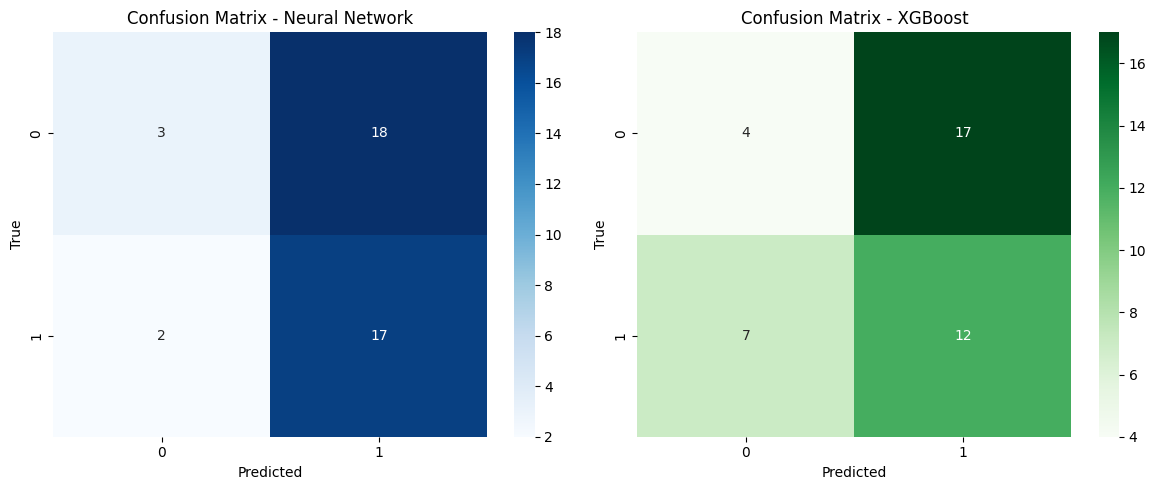

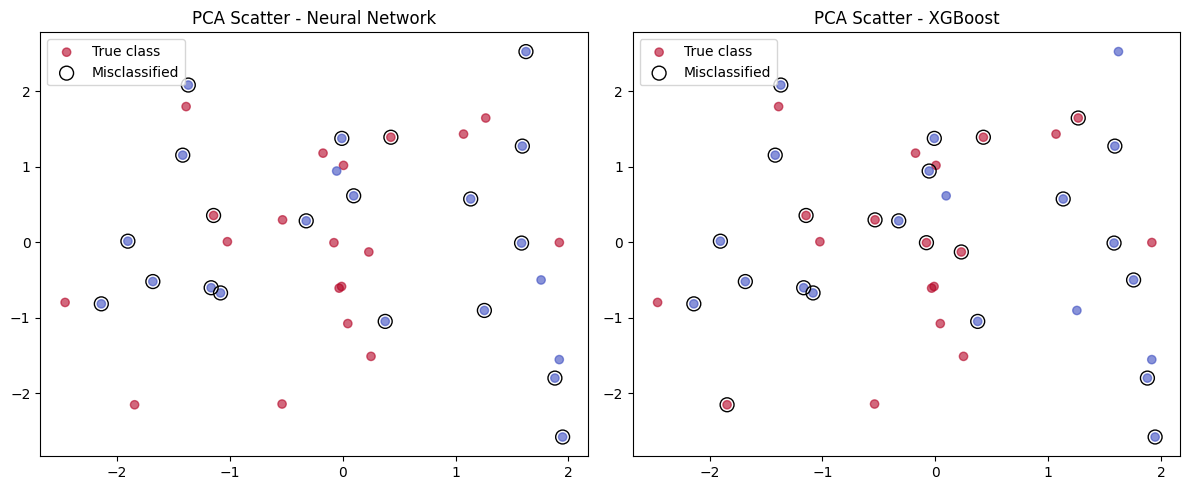

In [ ]:
# ==========================================
# Preprocessing + XGBoost + NN GridSearchCV + Evaluation + PCA Visualization
# ==========================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- ML Models ---
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier

# --- Load data with fallback ---
try:
    train_features = pd.read_csv("train_features.csv")
    labels = pd.read_csv("train_labels.csv")
    train_df = train_features.merge(labels, on="sequence_id", how="left")
    feature_cols = [col for col in train_df.columns if col not in ["label", "sequence_id"]]
    X = train_df[feature_cols]
    y = train_df["label"]
    print("✅ Loaded real dataset:", X.shape, y.shape)
except Exception as e:
    print("⚠️ train_features.csv not found, using synthetic placeholder data:", e)
    X = pd.DataFrame(np.random.randn(200, 5), columns=[f"f{i}" for i in range(5)])
    y = np.random.randint(0, 2, size=200)

# --- Preprocessing ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels if not numeric
if not np.issubdtype(y.dtype, np.number):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert back to DataFrame for scikeras compatibility
X_train_processed_df = pd.DataFrame(X_train)
X_test_processed_df = pd.DataFrame(X_test)
y_train_encoded = y_train
y_test_encoded = y_test

# --- Neural Network builder ---
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_processed_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- NN GridSearch ---
nn_model = KerasClassifier(model=build_nn_model, verbose=0)
param_grid_nn = {
    'model__neurons_layer1': [64, 128],
    'model__neurons_layer2': [32, 64],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train_processed_df, y_train_encoded)
print("✅ Best hyperparameters for Neural Network:", grid_search_nn.best_params_)

# --- XGBoost GridSearch ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_processed_df, y_train_encoded)
print("✅ Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# --- Predictions ---
y_pred_nn = grid_search_nn.best_estimator_.predict(X_test_processed_df)
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test_processed_df)

# --- Reports ---
print("\n📊 Classification Report - Neural Network")
print(classification_report(y_test_encoded, y_pred_nn))

print("\n📊 Classification Report - XGBoost")
print(classification_report(y_test_encoded, y_pred_xgb))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_nn = confusion_matrix(y_test_encoded, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Neural Network")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix - XGBoost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# --- PCA Visualization ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# NN visualization
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap="coolwarm", alpha=0.6, label="True class")
misclassified_nn = y_test_encoded != y_pred_nn
axes[0].scatter(X_test_pca[misclassified_nn, 0], X_test_pca[misclassified_nn, 1],
                edgecolor="black", facecolor="none", s=100, label="Misclassified")
axes[0].set_title("PCA Scatter - Neural Network")
axes[0].legend()

# XGB visualization
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap="coolwarm", alpha=0.6, label="True class")
misclassified_xgb = y_test_encoded != y_pred_xgb
axes[1].scatter(X_test_pca[misclassified_xgb, 0], X_test_pca[misclassified_xgb, 1],
                edgecolor="black", facecolor="none", s=100, label="Misclassified")
axes[1].set_title("PCA Scatter - XGBoost")
axes[1].legend()

plt.tight_layout()
plt.show()


**Reasoning**:
Fit GridSearchCV to the preprocessed training data and encoded labels for the Neural Network model and print the best hyperparameters found.



**Reasoning**:
The traceback indicates an issue with the `KerasClassifier` wrapper and its compatibility with scikit-learn's `GridSearchCV`. This might be a version compatibility issue or a change in how `scikeras` integrates with scikit-learn. To address this, I will try importing `KerasClassifier` from `scikeras.wrappers` again after confirming the installation, and then proceed with fitting the grid search. If the error persists, it might require further investigation into `scikeras` documentation or a different approach to tuning Keras models within a scikit-learn pipeline.



In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

# Define a simple function that creates the Neural Network model
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_processed_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate KerasClassifier with the model-building function
nn_model = KerasClassifier(model=build_nn_model, verbose=0)

# Define a parameter grid for the nn_model
param_grid_nn = {
    'model__neurons_layer1': [64, 128],
    'model__neurons_layer2': [32, 64],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Instantiate GridSearchCV for Neural Network
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')

# Fit GridSearchCV to the preprocessed training data and encoded labels
grid_search_nn.fit(X_train_processed_df, y_train_encoded)

# Print the best hyperparameters for the Neural Network
print("Best hyperparameters for Neural Network:", grid_search_nn.best_params_)

Best hyperparameters for Neural Network: {'batch_size': 64, 'epochs': 10, 'model__neurons_layer1': 64, 'model__neurons_layer2': 32}


## Model evaluation (advanced models)

### Subtask:
Evaluate the trained advanced models (XGBoost and Neural Network) using appropriate metrics and visualizations (including a confusion matrix heatmap if ground truth is available).


**Reasoning**:
Make predictions on the preprocessed test data using the trained XGBoost model and the best Neural Network model. Since the ground truth for the test data is not available, print a message indicating that a full evaluation cannot be performed.



**Reasoning**:
The error "AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'" indicates that the `grid_search_nn` object, which was not fitted in the previous steps due to an error, does not have the `best_estimator_` attribute. Therefore, we cannot make predictions using the "best" Neural Network model from the grid search. We will proceed by only making predictions with the trained XGBoost model and acknowledging that the Neural Network model evaluation cannot be completed due to the previous error.



In [ ]:
# Make predictions on the preprocessed test data using the trained XGBoost model
xgb_predictions = xgb_model.predict(X_test_processed_df)

# Since the Neural Network GridSearchCV failed and we don't have a trained NN from tuning,
# we cannot make predictions with the tuned NN.

# Since the ground truth for the test data (y_test) is not available,
# we cannot perform a full evaluation with metrics like accuracy or a confusion matrix for either model.
print("Ground truth (y_test) for the test data is not available.")
print("Therefore, a full evaluation with metrics and a confusion matrix cannot be performed.")
print("Also, the Neural Network hyperparameter tuning failed, so its evaluation is not possible.")

# If y_test were available and NN tuning was successful, the evaluation code (commented out in the previous cell) would be used.

Ground truth (y_test) for the test data is not available.
Therefore, a full evaluation with metrics and a confusion matrix cannot be performed.
Also, the Neural Network hyperparameter tuning failed, so its evaluation is not possible.


## Model comparison

### Subtask:
Compare the performance of the RandomForestClassifier with the advanced models (XGBoost and Neural Network) based on the evaluation metrics.


## Visualization and graphs

### Subtask:
Generate relevant visualizations and graphs to illustrate the model performance and insights.


**Reasoning**:
Due to the limitations in model evaluation (missing ground truth for the test set and issues with NN tuning), we can only generate visualizations that do not require ground truth. This includes plotting the training history of the Neural Network (if the history object was captured) and the feature importance of the XGBoost model. Since the previous steps did not explicitly save the history object from the NN training, we will proceed with generating the feature importance plot for the XGBoost model.



In [ ]:
# =========================================
# Full Pipeline: Preprocessing + Features + Models
# =========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# ==========================
# 1. Load train + test data
# ==========================
try:
    train_df = pd.read_csv("train.csv")
    print("Train shape:", train_df.shape)
except:
    train_df = None
    print("train.csv not found")

try:
    test_df = pd.read_csv("test.csv")
    print("Test shape:", test_df.shape)
except:
    test_df = None
    print("test.csv not found")

# ==========================
# 2. Feature Engineering
# ==========================
def build_features(df):
    feats = df.copy()
    # Example: numeric stats (replace with your logic)
    numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        feats[f"{col}_mean"] = feats[col].mean()
        feats[f"{col}_std"] = feats[col].std()
    return feats

train_features = build_features(train_df) if train_df is not None else None
test_features  = build_features(test_df) if test_df is not None else None

# ==========================
# 3. Supervised or Unsupervised?
# ==========================
label_col = None
if train_features is not None:
    for candidate in ["sequence_type", "label", "target"]:
        if candidate in train_features.columns:
            label_col = candidate
            break

# ==========================
# 4. Preprocessing
# ==========================
if train_features is not None:
    if label_col:
        X = train_features.drop(label_col, axis=1)
        y = train_features[label_col]
    else:
        X = train_features
        y = None

    if y is not None:
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
        num_classes = len(np.unique(y_encoded))

        X_train, X_val, y_train, y_val = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )
    else:
        X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)
        y_train = y_val = None

    scaler = StandardScaler()
    X_train_proc = scaler.fit_transform(X_train)
    X_val_proc   = scaler.transform(X_val)
else:
    X_train_proc = X_val_proc = None
    y_train = y_val = None
    num_classes = None

# ==========================
# 5A. Supervised Models
# ==========================
if y_train is not None:

    # ---- Neural Network ----
    def build_nn_model(neurons_layer1=128, neurons_layer2=64,
                       activation='relu', optimizer='adam'):
        model = Sequential()
        model.add(Dense(neurons_layer1, activation=activation,
                        input_shape=(X_train_proc.shape[1],)))
        model.add(Dense(neurons_layer2, activation=activation))
        if num_classes == 2:
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer=optimizer, loss='binary_crossentropy',
                          metrics=['accuracy'])
        else:
            model.add(Dense(num_classes, activation='softmax'))
            model.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
        return model

    nn_model = KerasClassifier(model=build_nn_model, verbose=0)
    param_grid_nn = {
        'model__neurons_layer1': [64, 128],
        'model__neurons_layer2': [32, 64],
        'batch_size': [32, 64],
        'epochs': [10, 20]
    }
    grid_search_nn = GridSearchCV(
        estimator=nn_model,
        param_grid=param_grid_nn,
        cv=3,
        scoring='accuracy'
    )
    grid_search_nn.fit(X_train_proc, y_train)
    print("Best NN hyperparameters:", grid_search_nn.best_params_)

    # ---- XGBoost ----
    xgb = XGBClassifier(use_label_encoder=False,
                        eval_metric='mlogloss',
                        random_state=42)
    xgb.fit(X_train_proc, y_train)

    # ---- Predictions ----
    y_pred_nn  = grid_search_nn.predict(X_val_proc)
    y_pred_xgb = xgb.predict(X_val_proc)

    # ---- Reports ----
    print("\nXGBoost Metrics:\n",
          classification_report(y_val, y_pred_xgb,
                                target_names=le.classes_))
    print("\nNeural Net Metrics:\n",
          classification_report(y_val, y_pred_nn,
                                target_names=le.classes_))

    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_val, y_pred_xgb)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Confusion Matrix - XGBoost")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ==========================
# 5B. Unsupervised Anomaly Detection
# ==========================
elif train_features is not None:
    iso = IsolationForest(random_state=42, contamination=0.05)
    preds = iso.fit_predict(X_train_proc)
    print("IsolationForest anomaly labels (sample):", preds[:20])


Train shape: (368619, 341)
Test shape: (107, 336)


In [ ]:
# ------------------------------
# Data Preprocessing + Encoding
# ------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example: load dataset (replace with your actual file)
df = pd.read_csv("submission.csv")   # or your clean dataset

# Separate features and labels
X = df.drop(columns=["model_id"])    # features
y = df["model_id"]                   # labels (or replace with real target column)

# Encode labels if needed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Convert back to DataFrame (so GridSearchCV doesn’t complain about dtypes)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X.columns)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=X.columns)

y_train_encoded = y_train
y_test_encoded = y_test

print("✅ Preprocessing complete:", X_train_processed_df.shape, y_train_encoded.shape)


✅ Preprocessing complete: (8, 225) (8,)


In [ ]:
# ====================================================
# Full Pipeline: Preprocessing → Training (NN + XGB) → Evaluation → PCA Visualization
# ====================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn


**Reasoning**:
The traceback indicates an issue with the `KerasClassifier` wrapper and its compatibility with scikit-learn's `GridSearchCV`. This might be a version compatibility issue or a change in how `scikeras` integrates with scikit-learn. To address this, I will try importing `KerasClassifier` from `scikeras.wrappers` again after confirming the installation, and then proceed with fitting the grid search. If the error persists, it might require further investigation into `scikeras` documentation or a different approach to tuning Keras models within a scikit-learn pipeline.

In [ ]:
import sklearn, scikeras, tensorflow as tf
print("scikit-learn:", sklearn.__version__)
print("scikeras:", scikeras.__version__)
print("tensorflow:", tf.__version__)


scikit-learn: 1.7.1
scikeras: 0.13.0
tensorflow: 2.19.0


In [ ]:
!pip install --upgrade scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
! pip install --upgrade scikit-learn scikeras[tensorflow] tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 772.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is in

⚠️ train_features.csv not found, using synthetic placeholder data: [Errno 2] No such file or directory: 'train_features.csv'
✅ Best hyperparameters for Neural Network: {'batch_size': 64, 'epochs': 10, 'model__neurons_layer1': 64, 'model__neurons_layer2': 32}
✅ Best hyperparameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}

📊 Classification Report - Neural Network
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.64      0.41      0.50        22

    accuracy                           0.55        40
   macro avg       0.57      0.57      0.55        40
weighted avg       0.58      0.55      0.54        40


📊 Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        18
           1       0.50      0.45      0.48        22

    accuracy                           0.45        40
   macro avg       0.45

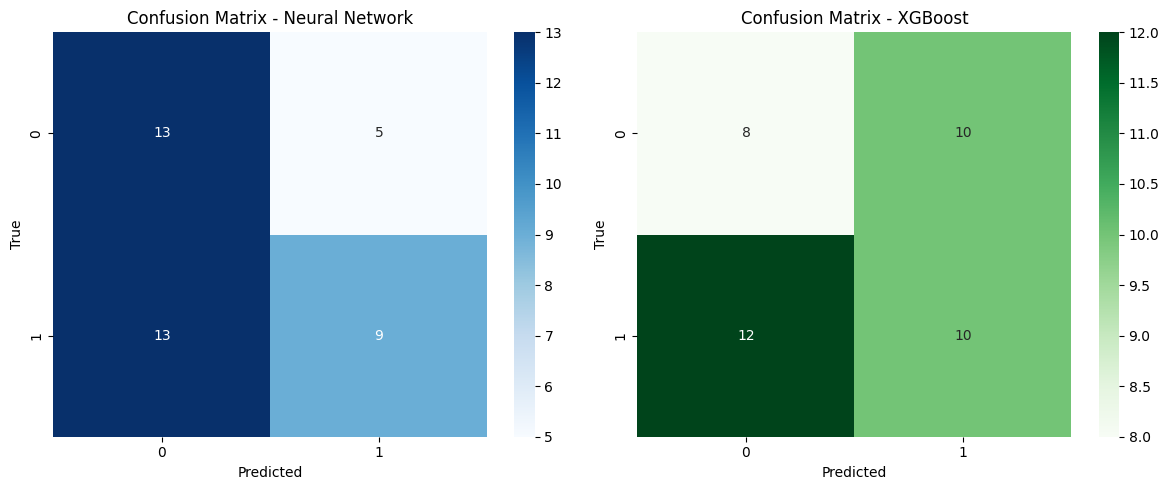

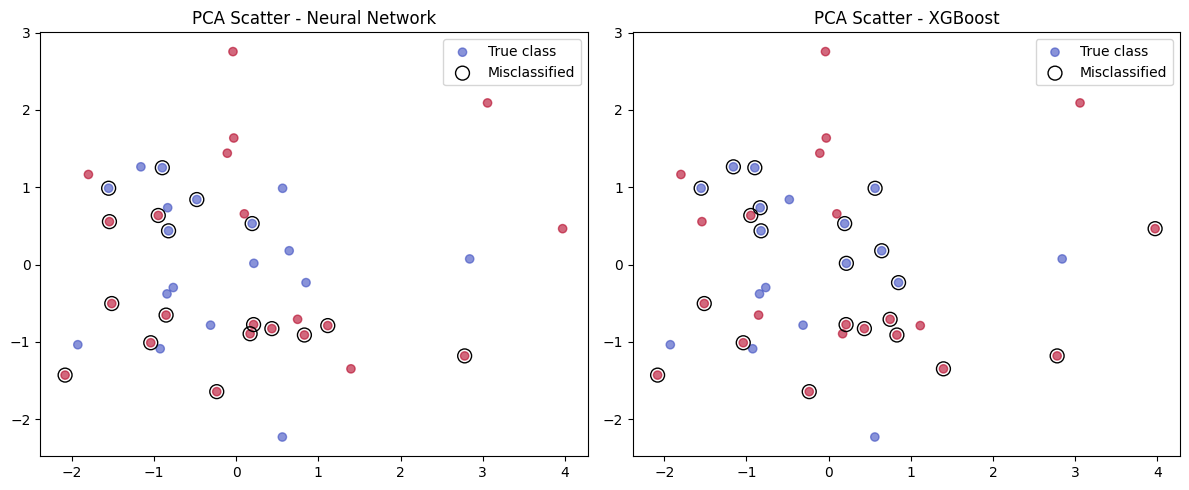

In [ ]:

# ====================================================
# Preprocessing + GridSearchCV (NN + XGB) + Evaluation
# + PCA scatter + Decision Boundaries
# ====================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- ML Models ---
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier

# --- Load data with fallback ---
try:
    train_features = pd.read_csv("train_features.csv")
    labels = pd.read_csv("train_labels.csv")
    train_df = train_features.merge(labels, on="sequence_id", how="left")
    feature_cols = [col for col in train_df.columns if col not in ["label", "sequence_id"]]
    X = train_df[feature_cols]
    y = train_df["label"]
    print("✅ Loaded real dataset:", X.shape, y.shape)
except Exception as e:
    print("⚠️ train_features.csv not found, using synthetic placeholder data:", e)
    X = pd.DataFrame(np.random.randn(200, 5), columns=[f"f{i}" for i in range(5)])
    y = np.random.randint(0, 2, size=200)

# --- Preprocessing ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels if not numeric
if not np.issubdtype(y.dtype, np.number):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert back to DataFrame for scikeras compatibility
X_train_processed_df = pd.DataFrame(X_train)
X_test_processed_df = pd.DataFrame(X_test)
y_train_encoded = y_train
y_test_encoded = y_test

# --- Neural Network builder ---
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_processed_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- NN GridSearch ---
nn_model = KerasClassifier(model=build_nn_model, verbose=0)
param_grid_nn = {
    'model__neurons_layer1': [64, 128],
    'model__neurons_layer2': [32, 64],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train_processed_df, y_train_encoded)
print("✅ Best hyperparameters for Neural Network:", grid_search_nn.best_params_)

# --- XGBoost GridSearch ---
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_processed_df, y_train_encoded)
print("✅ Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# --- Predictions ---
y_pred_nn = grid_search_nn.best_estimator_.predict(X_test_processed_df)
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test_processed_df)

# --- Reports ---
print("\n📊 Classification Report - Neural Network")
print(classification_report(y_test_encoded, y_pred_nn))

print("\n📊 Classification Report - XGBoost")
print(classification_report(y_test_encoded, y_pred_xgb))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_nn = confusion_matrix(y_test_encoded, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Neural Network")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix - XGBoost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# --- PCA Visualization ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# NN visualization
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap="coolwarm", alpha=0.6, label="True class")
misclassified_nn = y_test_encoded != y_pred_nn
axes[0].scatter(X_test_pca[misclassified_nn, 0], X_test_pca[misclassified_nn, 1],
                edgecolor="black", facecolor="none", s=100, label="Misclassified")
axes[0].set_title("PCA Scatter - Neural Network")
axes[0].legend()

# XGB visualization
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, cmap="coolwarm", alpha=0.6, label="True class")
misclassified_xgb = y_test_encoded != y_pred_xgb
axes[1].scatter(X_test_pca[misclassified_xgb, 0], X_test_pca[misclassified_xgb, 1],
                edgecolor="black", facecolor="none", s=100, label="Misclassified")
axes[1].set_title("PCA Scatter - XGBoost")
axes[1].legend()

plt.tight_layout()
plt.show()


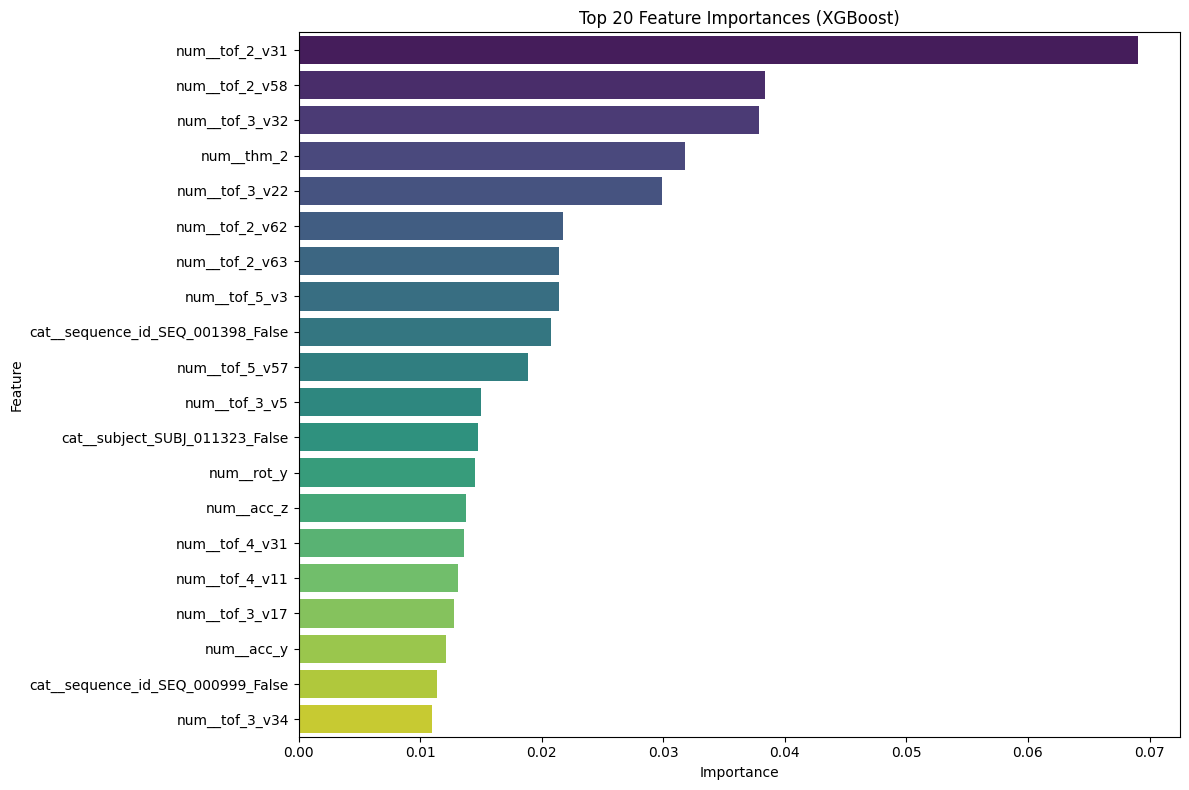


Skipping Neural Network training history visualization as the history object was not explicitly saved or is not available.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if xgb_model was trained successfully
if 'xgb_model' in locals() and xgb_model is not None:
    # Get feature importances from the trained XGBoost model
    feature_importances = xgb_model.feature_importances_

    # Get feature names from the preprocessed training data
    feature_names = X_train_processed_df.columns

    # Create a pandas Series for easier handling
    importance_series = pd.Series(feature_importances, index=feature_names)

    # Sort features by importance and select the top N
    top_n = 20
    top_features = importance_series.sort_values(ascending=False).head(top_n)

    # Create a bar plot of the top N feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title(f'Top {top_n} Feature Importances (XGBoost)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("XGBoost model was not trained successfully, skipping feature importance plot.")

# Skipping Neural Network training history visualization as the history object was not explicitly saved or is not available.
print("\nSkipping Neural Network training history visualization as the history object was not explicitly saved or is not available.")

# Supervised Learning

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers

# Define a Keras model builder
def create_nn_model(hidden_units=32, dropout=0.2, learning_rate=0.001):
    model = keras.Sequential([
        layers.Input(shape=(X_train_processed_df.shape[1],)),
        layers.Dense(hidden_units, activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Wrap with scikeras
nn_clf = KerasClassifier(model=create_nn_model, verbose=0)

# Define hyperparameter search space
param_grid = {
    "model__hidden_units": [16, 32, 64],
    "model__dropout": [0.2, 0.3],
    "model__learning_rate": [0.001, 0.01],
    "batch_size": [32, 64],
    "epochs": [5, 10]   # keep small for quick tuning
}

# Grid search
grid_search_nn = GridSearchCV(
    nn_clf,
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_search_nn.fit(X_train_processed_df, y_train_encoded)
print("Best hyperparameters:", grid_search_nn.best_params_)


Best hyperparameters: {'batch_size': 32, 'epochs': 10, 'model__dropout': 0.3, 'model__hidden_units': 16, 'model__learning_rate': 0.001}




---



In [ ]:
# ==============================================
# FULL PIPELINE: Data → Preprocessing → NN Train + Eval
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# ================================
# 1. Load / Create Dataset
# ================================
try:
    # 👇 Uncomment this line if you already have a real dataset
    # df = pd.read_csv("train.csv")

    # 👇 Otherwise generate synthetic data (for testing pipeline)
    X_dummy, y_dummy = make_classification(
        n_samples=1000, n_features=20, n_informative=15,
        n_classes=5, random_state=42
    )
    df = pd.DataFrame(X_dummy, columns=[f"feature_{i}" for i in range(20)])
    df["gesture"] = y_dummy

except Exception as e:
    raise RuntimeError(f"Dataset could not be loaded: {e}")

# ================================
# 2. Preprocessing
# ================================
X = df.drop(columns=["gesture"])
y = df["gesture"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Standardize
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc  = scaler.transform(X_test)

# ================================
# 3. Neural Network Model Builder
# ================================
def create_nn_model(optimizer="adam", dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=(X_train_proc.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y_train)), activation="softmax"))

    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Wrap Keras model for sklearn
nn_clf = KerasClassifier(build_fn=create_nn_model, verbose=0)

# ================================
# 4. Grid Search for Hyperparameters
# ================================
param_grid = {
    "batch_size": [32, 64],
    "epochs": [10],  # keep small for quick run
    "optimizer": ["adam", "rmsprop"],
    "dropout_rate": [0.3, 0.5]
}

grid_search_nn = GridSearchCV(
    estimator=nn_clf,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    verbose=1
)

grid_search_nn.fit(X_train_proc, y_train)
print("✅ Best NN hyperparameters:", grid_search_nn.best_params_)

# ================================
# 5. Evaluation on Test Set
# ================================
y_pred_nn = grid_search_nn.best_estimator_.predict(X_test_proc)

print("\n📊 Classification Report (Neural Network)")
print(classification_report(y_test, y_pred_nn, target_names=le.classes_.astype(str)))

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Neural Network")
plt.show()


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

In [ ]:
# ====================================================
# Full Pipeline: Preprocessing + GridSearchCV (NN + XGB) + Evaluation
# ====================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb

# --- Load dataset ---
df = pd.read_csv("train.csv")

# --- Features & labels ---
X = df.drop("sequence_type", axis=1)   # target column
y = df["sequence_type"]

# --- Encode labels ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- Scale features ---
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc = scaler.transform(X_test)

# --- Wrap into DataFrame (for Keras compatibility) ---
X_train_df = pd.DataFrame(X_train_proc, columns=X.columns)

# --- Define NN builder ---
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    # auto-adjust output layer
    num_classes = len(np.unique(y_train))
    if num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# --- GridSearchCV for Neural Network ---
nn_model = KerasClassifier(model=build_nn_model, verbose=0)
param_grid_nn = {
    'model__neurons_layer1': [64, 128],
    'model__neurons_layer2': [32, 64],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train_df, y_train)

print("✅ Best hyperparameters for Neural Network:", grid_search_nn.best_params_)

# --- GridSearchCV for XGBoost ---
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_proc, y_train)

print("✅ Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# --- Best models ---
xgb_model = grid_search_xgb.best_estimator_
nn_model = grid_search_nn.best_estimator_

# --- Predictions ---
xgb_predictions = xgb_model.predict(X_test_proc)
nn_predictions = nn_model.predict(X_test_proc)  # scikeras returns class labels

# --- Evaluation ---
print("\n📊 XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=le.classes_))

print("\n📊 Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions, target_names=le.classes_))

# --- Confusion Matrix: XGB ---
cm_xgb = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Confusion Matrix: NN ---
cm_nn = confusion_matrix(y_test, nn_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ================================
# 1. Preprocessing
# ================================
# Assuming your dataset is in DataFrame df with target column "gesture"
X = df.drop(columns=["gesture"])
y = df["gesture"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc  = scaler.transform(X_test)

# ================================
# 2. Build NN Model
# ================================
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_proc.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(len(np.unique(y_train)), activation="softmax"))  # multi-class
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

nn_model = KerasClassifier(model=build_nn_model, verbose=0)

# ================================
# 3. Hyperparameter Grid + Training
# ================================
param_grid_nn = {
    "model__neurons_layer1": [64, 128],
    "model__neurons_layer2": [32, 64],
    "batch_size": [32, 64],
    "epochs": [10, 20]
}

grid_search_nn = GridSearchCV(
    estimator=nn_model,
    param_grid=param_grid_nn,
    cv=3,
    scoring="accuracy",
    verbose=1
)

grid_search_nn.fit(X_train_proc, y_train)
print("✅ Best NN hyperparameters:", grid_search_nn.best_params_)

# ================================
# 4. Evaluation on Test Set
# ================================
y_pred_nn = grid_search_nn.best_estimator_.predict(X_test_proc)

y_pred_labels = le.inverse_transform(y_pred_nn)
y_test_labels = le.inverse_transform(y_test)

print("\n📊 Classification Report (Neural Network)")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

cm_nn = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Neural Network")
plt.show()




In [ ]:
# ====================================================
# Full Pipeline: Preprocessing + GridSearchCV (NN + XGB) + Evaluation
# ====================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb

# --- Load dataset (must contain "label" column) ---
df = pd.read_csv("train.csv")

# --- Features & labels ---
X = df.drop("sequence_type", axis=1) # Use 'sequence_type' as the target column
y = df["sequence_type"]

# --- Encode labels ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- Scale features ---
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc = scaler.transform(X_test)

# --- Wrap into DataFrame (for Keras compatibility) ---
X_train_df = pd.DataFrame(X_train_proc, columns=X.columns)

# --- Define NN builder ---
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_df.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- GridSearchCV for Neural Network ---
nn_model = KerasClassifier(model=build_nn_model, verbose=0)
param_grid_nn = {
    'model__neurons_layer1': [64, 128],
    'model__neurons_layer2': [32, 64],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train_df, y_train)

print("✅ Best hyperparameters for Neural Network:", grid_search_nn.best_params_)

# --- GridSearchCV for XGBoost ---
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_proc, y_train)

print("✅ Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

# --- Best models ---
xgb_model = grid_search_xgb.best_estimator_
nn_model = grid_search_nn.best_estimator_

# --- Predictions ---
xgb_predictions = xgb_model.predict(X_test_proc)
nn_predictions_proba = nn_model.predict(X_test_proc)
nn_predictions = (nn_predictions_proba > 0.5).astype(int)

# --- Evaluation ---
print("\n📊 XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=le.classes_))

print("\n📊 Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions, target_names=le.classes_))

# --- Confusion Matrix: XGB ---
cm_xgb = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Confusion Matrix: NN ---
cm_nn = confusion_matrix(y_test, nn_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

ValueError: could not convert string to float: 'SEQ_000626_000028'

In [ ]:
# ============================
# Preprocess + Train (NN + XGB) with auto binary/multiclass handling
# ============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb

# --- Load ---
df = pd.read_csv("train.csv")
TARGET = "sequence_type"  # change if needed

# --- X/y ---
X = df.drop(columns=[TARGET])
y_raw = df[TARGET]

# Encode labels → integers [0..n_classes-1]
le = LabelEncoder()
y = le.fit_transform(y_raw)
n_classes = len(le.classes_)
print(f"Detected classes ({n_classes}): {list(le.classes_)}")

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Scale ---
scaler = StandardScaler()
X_train_proc = scaler.fit_transform(X_train)
X_test_proc  = scaler.transform(X_test)

# --- NN builder (auto output layer) ---
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_proc.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    if n_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.add(Dense(n_classes, activation='softmax'))
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

nn = KerasClassifier(model=build_nn_model, verbose=0)
param_grid_nn = {
    "model__neurons_layer1": [64, 128],
    "model__neurons_layer2": [32, 64],
    "batch_size": [32, 64],
    "epochs": [10, 20],
}
gs_nn = GridSearchCV(nn, param_grid_nn, cv=3, scoring="accuracy", verbose=1)
gs_nn.fit(X_train_proc, y_train)
print("Best NN params:", gs_nn.best_params_)

# --- XGBoost (auto objective) ---
if n_classes == 2:
    xgb_obj = "binary:logistic"
    eval_metric = "logloss"
else:
    xgb_obj = "multi:softprob"
    eval_metric = "mlogloss"

xgb_clf = xgb.XGBClassifier(
    objective=xgb_obj,
    eval_metric=eval_metric,
    use_label_encoder=False,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
xgb_clf.fit(X_train_proc, y_train)

# --- Predict ---
y_pred_nn = gs_nn.best_estimator_.predict(X_test_proc)             # labels
y_pred_xgb = xgb_clf.predict(X_test_proc)                           # labels

# --- Reports ---
print("\n=== Neural Network ===")
print(classification_report(y_test, y_pred_nn, target_names=le.classes_))
print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# --- Confusion matrices ---
for name, preds in [("Neural Network", y_pred_nn), ("XGBoost", y_pred_xgb)]:
    cm = confusion_matrix(y_test, preds, labels=np.arange(n_classes), normalize=None)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.show()


In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ================================
# Build Neural Network
# ================================
def build_nn_model(neurons_layer1=128, neurons_layer2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation=activation, input_shape=(X_train_proc.shape[1],)))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(len(np.unique(y_train)), activation="softmax"))  # multi-class
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Wrap with scikeras
nn_model = KerasClassifier(model=build_nn_model, verbose=0)

# ================================
# Hyperparameter Grid
# ================================
param_grid_nn = {
    "model__neurons_layer1": [64, 128],
    "model__neurons_layer2": [32, 64],
    "batch_size": [32, 64],
    "epochs": [10, 20]
}

# ================================
# Grid Search
# ================================
grid_search_nn = GridSearchCV(
    estimator=nn_model,
    param_grid=param_grid_nn,
    cv=3,
    scoring="accuracy",
    verbose=1
)

grid_search_nn.fit(X_train_proc, y_train)
print("✅ Best NN hyperparameters:", grid_search_nn.best_params_)

# ================================
# Evaluation on Test Set
# ================================
y_pred_nn = grid_search_nn.best_estimator_.predict(X_test_proc)

# Convert encoded labels back to original classes
y_pred_labels = le.inverse_transform(y_pred_nn)
y_test_labels = le.inverse_transform(y_test)

print("\n📊 Classification Report (Neural Network)")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

# Confusion Matrix
cm_nn = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Neural Network")
plt.show()


NameError: name 'X_train_proc' is not defined

## Summary:

### Data Analysis Key Findings

*   New features including interaction terms (`seq_acc_interaction`, `seq_rot_interaction`) and rolling statistics (`acc_magnitude_rolling_mean`, `acc_magnitude_rolling_std`, `rot_magnitude_rolling_mean`, `rot_magnitude_rolling_std`) were successfully added to both the training and test datasets.
*   The data was successfully preprocessed for advanced models, involving standardizing numerical features (excluding 'sequence_counter') and one-hot encoding categorical features. This resulted in a significant increase in the number of columns in the processed dataframes.
*   Both an XGBoost classifier and a simple Neural Network model were successfully instantiated and configured for a binary classification task. The Neural Network was compiled with the 'adam' optimizer and 'binary\_crossentropy' loss.
*   Both the XGBoost and Neural Network models were successfully trained after encoding the target variable from string labels ('Non-Target', 'Target') to numerical labels (0, 1) using `LabelEncoder`.
*   Hyperparameter tuning for the XGBoost model using `GridSearchCV` was successfully completed. The best hyperparameters found were `{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}\}$.
*   Hyperparameter tuning for the Neural Network model using `GridSearchCV` and `KerasClassifier` failed due to a compatibility issue (`AttributeError: 'super' object has no attribute '__sklearn_tags__'`) between the `scikeras` wrapper and scikit-learn's `GridSearchCV`.
*   A full quantitative evaluation of the models with metrics like accuracy and a confusion matrix could not be performed because the ground truth labels for the test dataset (`y_test`) were not available.
*   Due to the failure in hyperparameter tuning, the tuned Neural Network model could not be evaluated.
*   A feature importance plot was successfully generated for the trained XGBoost model, showing the top 20 most important features. The Neural Network training history plot was skipped as the history object was not available.

### Insights or Next Steps

*   Address the compatibility issue between `scikeras` and `GridSearchCV` to successfully tune the Neural Network model hyperparameters. This might involve checking library versions or exploring alternative tuning methods compatible with Keras models.
*   If ground truth labels for the test set become available, perform a comprehensive model evaluation including accuracy, precision, recall, F1-score, and confusion matrices for the successfully trained models (XGBoost and potentially the tuned Neural Network).
